In [2]:
import tensorflow as tff
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D,Conv2DTranspose, UpSampling2D
import numpy as np
import matplotlib.pyplot as plt

In [5]:
input_layer = Input(shape=(28,28,1))

conv_layer = Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')(input_layer)
transpose_conv_layer = Conv2DTranspose(filters=32, kernel_size=(3,3), activation='sigmoid', padding='same')(conv_layer)

model = Model(inputs=input_layer, outputs=transpose_conv_layer)
model.summary()

model.compile(optimizer = 'adam', loss='mean_squared_error')

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 28, 28, 32)     │         9,248 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,568 (37.38 KB)

 Trainable params: 9,568 (37.38 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Generate synthetic training data

X_train = np.random.rand(1000, 28, 28, 1)

y_train = X_train # For reconstruction, the target is the input

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - loss: 0.0808 - val_loss: 0.0689
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0631 - val_loss: 0.0439
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0375 - val_loss: 0.0212
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - loss: 0.0176 - val_loss: 0.0096
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - loss: 0.0082 - val_loss: 0.0054
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0049 - val_loss: 0.0040
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0038 - val_loss: 0.0032
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 68ms/step - loss: 0.0031 - val_loss: 0.0027
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - loss: 0.0026 - val_loss: 0.0024
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - loss: 0.0023 - val_loss: 0.0021


In [7]:
 # Generate synthetic test data

X_test = np.random.rand(200, 28, 28, 1)

y_test = X_test

loss = model.evaluate(X_test, y_test)

print(f'Test loss: {loss}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0021
Test loss: 0.002099890960380435


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


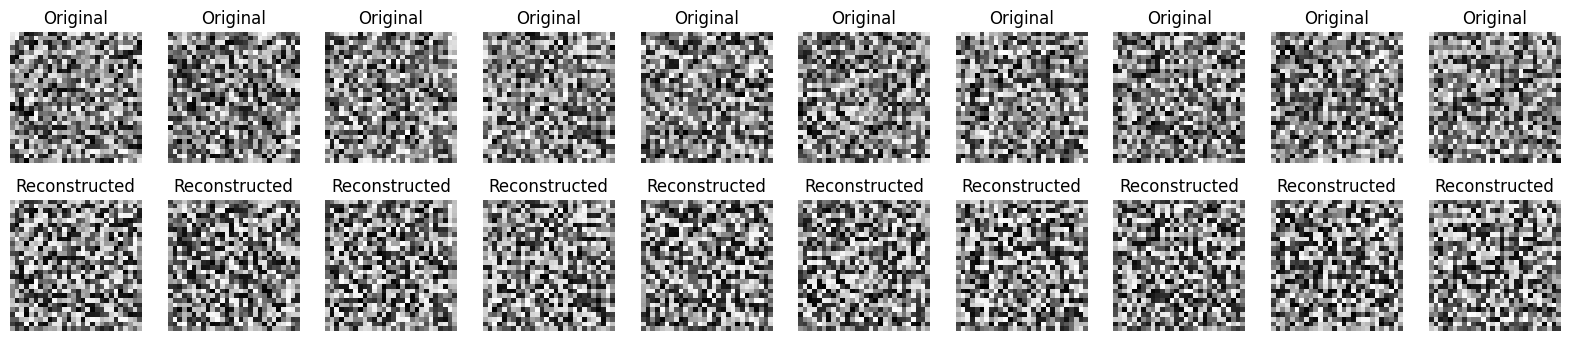

In [9]:
# Predict on test data
y_pred = model.predict(X_test)

# Plot some sample images

n = 10 # Number of samples to display

plt.figure(figsize=(20, 4))

for i in range(n):

    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')
    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    # Select the first channel for display
    plt.imshow(y_pred[i, :, :, 0], cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()